In [156]:
from pprint import pprint

import torchvision
from torchvision import transforms

In [5]:
data = "./data"
train_data = torchvision.datasets.MNIST(data, train=True, download=True)
test_data = torchvision.datasets.MNIST(data, train=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
from matplotlib.pyplot import imshow

In [7]:
x_samples, y_samples = train_data[0]

In [9]:
x_samples

In [10]:
y_samples

5

In [15]:
x_samples.shape

AttributeError: 'Image' object has no attribute 'shape'

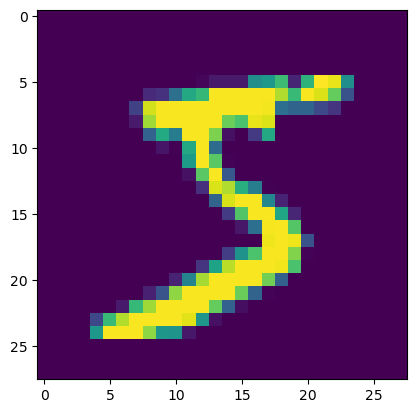

In [14]:
imshow(x_samples)

In [16]:
image_to_tensor = transforms.Compose([transforms.ToTensor()])

In [18]:
tensor_sample = image_to_tensor(x_samples)

In [20]:
tensor_sample.shape

torch.Size([1, 28, 28])

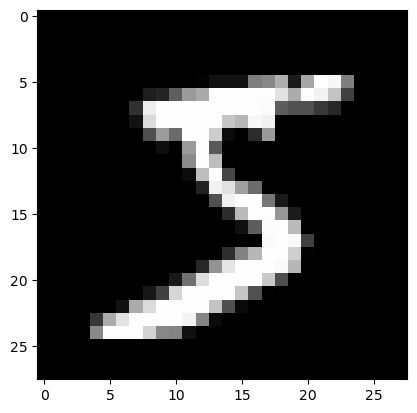

In [21]:
imshow(tensor_sample[0,:], cmap='gray')

In [24]:
x1, x2, x3 = train_data[0], train_data[1], train_data[2]

In [38]:
x1 = image_to_tensor(x1)

In [39]:
x2 = image_to_tensor(x2)

In [40]:
x3 = image_to_tensor(x3)

In [31]:
import torch

In [41]:
x_as_color = torch.stack([x1[0, :], x2[0, :], x3[0, :]], dim=0)

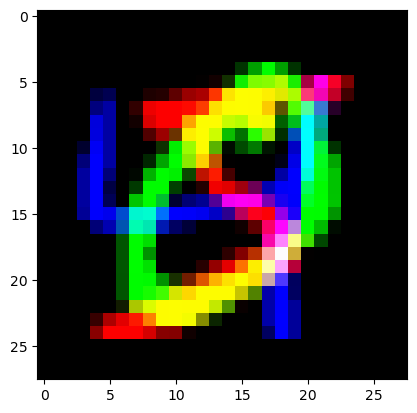

In [46]:
imshow(x_as_color.permute(1, 2, 0))

In [83]:
filter = [1, 0, -1]

In [84]:
input = [1, 0, 2, -1, 1, 2]

In [85]:
output = []

In [86]:
for i in range(len(input) - 2 * (len(filter) // 2)):
    result = 0
    for j in range(len(filter)):
        result += input[i+j] * filter[j]
    output.append(result)

In [87]:
len(output)

4

In [88]:
output

[-1, 1, 1, -3]

### 2D convolution

In [90]:
filter = [[0, 1, 0], [0, 1, 0], [0, 1, 0]]
input = [
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1]
]

In [98]:
output = []

In [99]:
h, w = len(input), len(input[0])

In [100]:
h, w

(6, 6)

In [101]:
for i in range(h - len(filter) + 1):
    row_out = []
    for j in range(w - len(filter) + 1):
        result = 0
        for k_i in range(len(filter)):
            for k_j in range(len(filter)):
                result += input[i + k_i][j + k_j] * filter[k_i][k_j]
        row_out.append(result)
    output.append(row_out)

In [103]:
output

[[1, 1, 3, 0], [1, 0, 3, 0], [0, 0, 3, 1], [1, 1, 3, 2]]

In [104]:
from scipy.signal import convolve

In [105]:
img_index = 58

In [113]:
img = train_data[img_index][0]

In [114]:
img

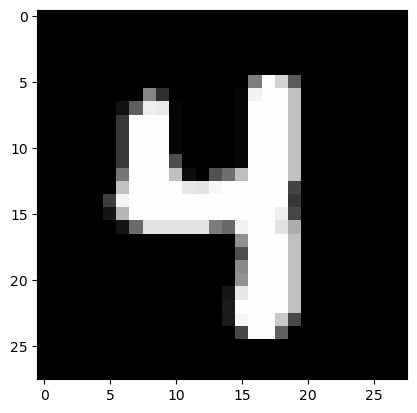

In [117]:
imshow(img, cmap='gray')

In [118]:
import numpy as np

In [119]:
blur_filter = np.asarray([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
]) / 9.0

In [120]:
blured_img = convolve(img, blur_filter)

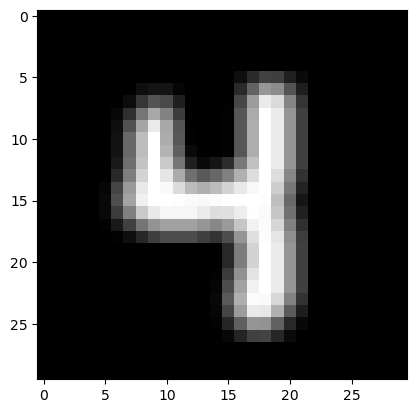

In [131]:
imshow(blured_img, cmap='gray')

In [157]:
edge_filter = np.asarray([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

In [158]:
edge_img = convolve(img, edge_filter)

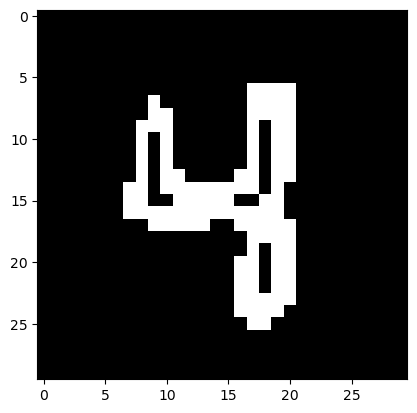

In [159]:
imshow(edge_img, vmin=0, vmax=1, cmap='gray')

In [160]:
h_edge_filter = np.asarray([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [161]:
h_edge_img = convolve(img, h_edge_filter)

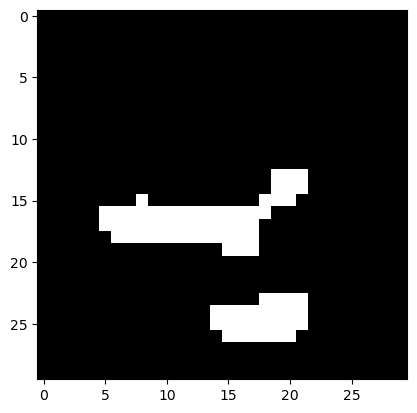

In [163]:
imshow(h_edge_img, vmin=0, vmax=1, cmap='gray')

In [165]:
first_image, _ = train_data[0]

In [166]:
first_image

In [168]:
first_image_tensor = image_to_tensor(first_image)

In [170]:
first_image_tensor.shape

torch.Size([1, 28, 28])

In [171]:
first_image_tensor = first_image_tensor.unsqueeze(0)

In [172]:
first_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [173]:
blur_tensor = torch.tensor([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
], dtype=torch.float32) / 9.0

In [178]:
blur_tensor.shape

torch.Size([3, 3])

In [181]:
blur_tensor = blur_tensor.unsqueeze(0).unsqueeze(0)

In [182]:
blur_tensor.shape

torch.Size([1, 1, 3, 3])

In [183]:
import torch.nn.functional as F

In [185]:
blurred_image = F.conv2d(first_image_tensor, blur_tensor, padding=1)

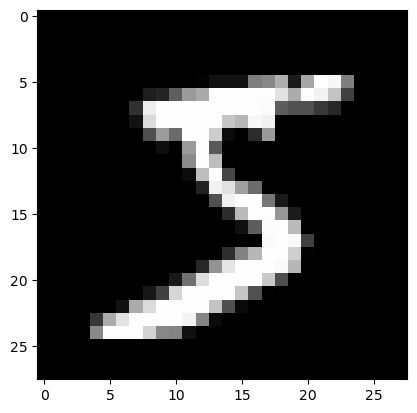

In [188]:
imshow(first_image,  cmap='gray')

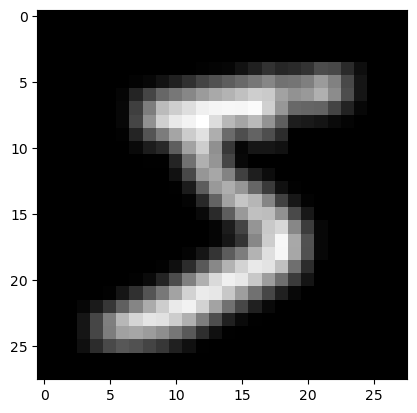

In [187]:
imshow(blurred_image.squeeze(), cmap='gray')

In [241]:
edge_tensor = torch.tensor([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
], dtype=torch.float32)

In [242]:
edge_tensor = edge_tensor.unsqueeze(0).unsqueeze(0)

In [243]:
edge_tensor.shape

torch.Size([1, 1, 3, 3])

In [254]:
edged_image = F.conv2d(first_image_tensor, edge_tensor, padding=1, dilation=1)

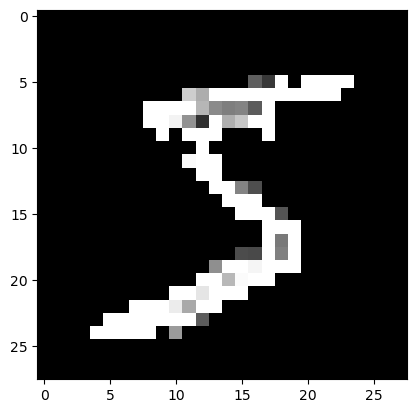

In [256]:
imshow(edged_image.squeeze(), vmin=0, vmax=1, cmap='gray')

## Autograd

In [273]:
x = torch.tensor([-3.5], requires_grad=True)

In [274]:
x_cur = x.clone()

In [275]:
x_prev = x_cur * 100

In [276]:
eps = 1e-5

In [277]:
lr = 0.1

In [278]:
def f(x):
    return (x - 2) ** 2

In [279]:
while torch.linalg.norm(x_cur - x_prev) > eps:
    x_prev = x_cur.clone()
    
    value = f(x)
    
    value.backward()
    x.data -= lr * x.grad
    
    x.grad.zero_()
    
    x_cur = x.data

In [280]:
print(x_cur)

tensor([2.0000])


## Optimizers

In [281]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

In [282]:
optimizer = torch.optim.SGD([x_param], lr=lr)

In [288]:
for epoch in range(60):
    optimizer.zero_grad()
    loss_incurred = f(x_param)
    loss_incurred.backward()
    step = optimizer.step()

In [289]:
print(x_param.data)

tensor([2.0000])


## Data Augmentation

In [303]:
sample_transforms = {
    "Rotation": transforms.RandomAffine(degrees=45),
    "Translation": transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    "Shear": transforms.RandomAffine(degrees=0, shear=45),
    "Random Crop": transforms.RandomCrop((20, 20)),
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0),
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0),
    "Perspective": transforms.RandomPerspective(p=1.0),
    "ColorJitter": transforms.ColorJitter(brightness=0.5, contrast=0.5),
}

In [304]:
from matplotlib import pyplot as plt

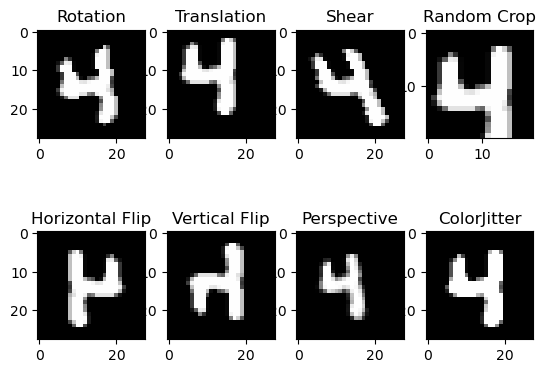

In [305]:
f, axarr = plt.subplots(2, 4)

for count, (name, t) in enumerate(sample_transforms.items()):
    row = count % 4
    col = count // 4
    axarr[col, row].imshow(t(img), cmap='gray')
    axarr[col, row].set_title(name)
plt.show()